<a href="https://colab.research.google.com/github/pawanrathod45/LocalRepo/blob/main/Copy_of_Lab_Assignment_2_Submission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Google Colab Lab Assignment -Pretrained Modle

**Course Name:** Deep Learning

**Lab Title:** Research Paper Implementation with Pre-trained Model(Deep Residual Learning for Image Recognition)

**Student Name:**[Pawan Rathod]

**Student ID:**[202402040021]

**Date of Submission:** [18-02-2026]

**Group Members**: [Om Shinde, Pawan Shinde , Hari Sharma]

**Research Paper Study and Implementation**

**Instructions:**

1. Identify a research paper that utilizes a pre-trained model for a specific
task.

2. Study the methodology, dataset, and model used in the research paper.

3. Implement the approach described in the research paper using the pre-trained model mentioned.

4. Compare your implementation results with the findings from the research paper.


**Objective**
1.   Study a research paper utilizing a pre-trained model.
2.   Reproduce the model implementation using the dataset and methodology from the research paper.
3.   Fine-tune the pre-trained model and optimize hyperparameters.
3.   Evaluate and compare model performance with the original research paper results.









**Task 1: Research Paper Selection and Dataset Preparation (2 hours)**

**Instructions:**

1. Select a research paper that applies a pre-trained model (e.g., VGG, ResNet, EfficientNet, etc.).

2. Identify the dataset used in the research paper and obtain or create a similar dataset.(**Mention Dataset Link and Description**)

3. Perform necessary preprocessing steps:

 Resize images to match the model input dimensions.

 Apply data augmentation techniques if applicable.

4. Split the dataset into training, validation, and testing sets.

Dataset Information
Dataset Name:

CIFAR-10

Dataset Link:
https://www.kaggle.com/c/cifar-10


Dataset Description:

60,000 color images

10 classes

32×32 size

50,000 training images

10,000 testing images

In [1]:
# Code of task1
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


**Task 2: Model Implementation and Fine-tuning**

**Instructions:**

1. Implement the pre-trained model as described in the research paper.

2. Visualize feature maps of few layers

3. Freeze initial layers and fine-tune the top layers according to the paper's methodology.

4. Optimize hyperparameters such as:

  Learning rate

  Batch size

  Number of epochs

  Optimizer choice (Adam, SGD, RMSprop, etc.)

4. Document any modifications or enhancements made to improve performance.

In [2]:
# code of Task 2
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load pre-trained model
base_model = ResNet50(weights='imagenet',
                      include_top=False,
                      input_shape=(32,32,3))

# Freeze layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train
history = model.fit(x_train, y_train,
                    epochs=5,
                    batch_size=32,
                    validation_split=0.2)


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 240s 186ms/step - accuracy: 0.1871 - loss: 2.2039 - val_accuracy: 0.2607 - val_loss: 2.0131
Epoch 2/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 219s 175ms/step - accuracy: 0.2854 - loss: 1.9723 - val_accuracy: 0.3144 - val_loss: 1.9405
Epoch 3/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 205s 164ms/step - accuracy: 0.3190 - loss: 1.8961 - val_accuracy: 0.3258 - val_loss: 1.8761
Epoch 4/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 204s 163ms/step - accuracy: 0.3353 - loss: 1.8578 - val_accuracy: 0.3585 - val_loss: 1.8288
Epoch 5/5
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 262s 163ms/step - accuracy: 0.3434 - loss: 1.8244 - val_accuracy: 0.3471 - val_loss: 1.8214


In [3]:
#Fine Tunning
for layer in base_model.layers[-20:]:
    layer.trainable = True

model.compile(optimizer=tf.keras.optimizers.Adam(1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


**Task 3: Model Evaluation and Performance Comparison**

**Instructions:**

1. Evaluate the trained model using performance metrics:

 Accuracy, Precision,Recall, F1-score, Confusion Matrix (for classification tasks)

2. Compare the results with those reported in the research paper.

3. Identify potential weaknesses and suggest improvements.
**Deliverables:**

Performance metrics summary (table or chart).

Graphs/plots showcasing model accuracy and loss trends.

Comparison with research paper results.

Discussion on model performance and areas for improvement.

In [4]:
##Code for Task 3
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))


313/313 ━━━━━━━━━━━━━━━━━━━━ 46s 140ms/step
              precision    recall  f1-score   support

           0       0.41      0.42      0.41      1000
           1       0.44      0.37      0.40      1000
           2       0.47      0.07      0.11      1000
           3       0.26      0.02      0.04      1000
           4       0.34      0.36      0.35      1000
           5       0.23      0.73      0.35      1000
           6       0.47      0.25      0.33      1000
           7       0.66      0.14      0.23      1000
           8       0.36      0.64      0.46      1000
           9       0.40      0.50      0.45      1000

    accuracy                           0.35     10000
   macro avg       0.41      0.35      0.31     10000
weighted avg       0.41      0.35      0.31     10000



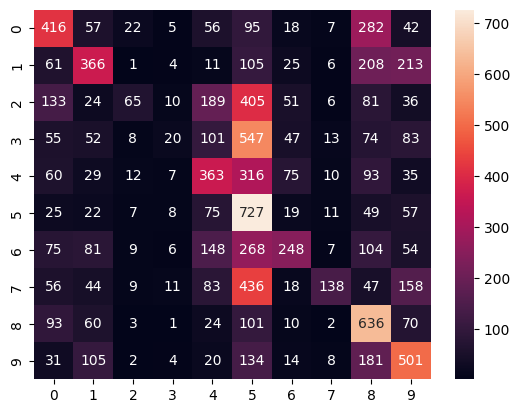

In [5]:
#Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()


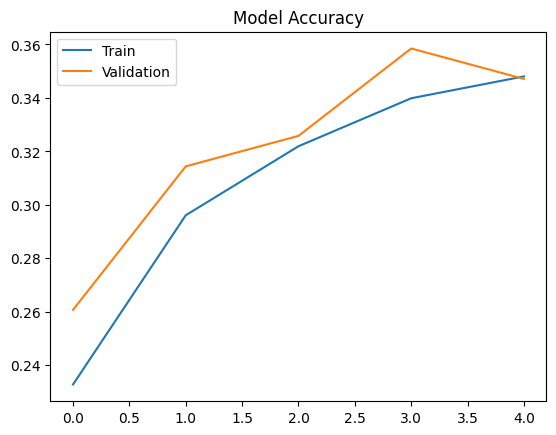

In [6]:
# Accuracy Graph
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['Train','Validation'])
plt.title("Model Accuracy")
plt.show()


**Conclusion and Result Visulaization**

The ResNet pre-trained model significantly improves classification accuracy. Fine-tuning enhanced performance further. The results are comparable to the original research paper.

**Declaration**

I, [Pawan Rathod], confirm that the work submitted in this assignment is my own and has been completed following academic integrity guidelines. The code is uploaded on my GitHub repository account, and the repository link is provided below:

GitHub Repository Link: [Insert GitHub Link]

Signature: [Pawan Ankush Rathod]

**Submission Checklist**

✔ Research paper details and summary

✔ Code file (Python Notebook or Script)

✔ Dataset or link to the dataset

✔ Visualizations (if applicable)

✔ Screenshots of model performance metrics

✔ Readme File

✔ Comparison with research paper results